In [175]:
import sys
import time
import os
import subprocess
import math
import matplotlib.pyplot as plt
import numpy as np
import pylab as py
import random
import pandas as pd

In [176]:
####################################### Set Axes
def set_axes(ax, xlim=None, ylim=None, fontsize=16, twinx=True, twiny=True, minor=True, inout='in'):
        
        if not ylim is None:
            ax.set_ylim(ylim)
        else:
            ylim = ax.get_ylim() 
            
        if not xlim is None:    
            ax.set_xlim(xlim) 
        else:
            xlim = ax.get_xlim()
            
        ax.tick_params(which='major', length=6, width=1., direction=inout)
#         if minor:
        ax.tick_params(which='minor', length=3, color='#000033', width=1.0, direction=inout)  
        
        if twiny:
            y_ax = ax.twinx()
            y_ax.set_ylim(ylim)
            y_ax.set_yticklabels([])
            y_ax.minorticks_on()
            y_ax.tick_params(which='major', length=6, width=1., direction=inout)
            if minor:
                y_ax.tick_params(which='minor', length=3, color='#000033', width=1.0, direction=inout) 
        
        if twinx:
            x_ax = ax.twiny()
            x_ax.set_xlim(xlim)
            x_ax.set_xticklabels([])
            x_ax.minorticks_on()
            x_ax.tick_params(which='major', length=6, width=1.0, direction=inout)
            if minor:
                x_ax.tick_params(which='minor', length=3, color='#000033', width=1.0, direction=inout)     

        for tick in ax.xaxis.get_major_ticks():
                    tick.label.set_fontsize(fontsize) 
        for tick in ax.yaxis.get_major_ticks():
                    tick.label.set_fontsize(fontsize) 
        
        return x_ax, y_ax

In [177]:
df = pd.read_csv("CF4_TF_distances.csv", sep='|')

df.head()

,pgc,DMbest,eDMbest,PGC1,Nest,Vh,Vls,Vcmb,f,DMr,...,DE,GLong,GLat,SGL,SGB,Nkt,N15,SGLg,SGBg,Vmodg
0,2,34.24,0.29,73150,200275,5004,5296,4726,1.013,0.00,...,47.2745,113.9553,-14.6992,341.6440,20.7388,0,7,341.4922,20.7395,4976
1,4,33.29,0.17,120,202766,4458,4706,4109,1.011,33.31,...,23.0876,107.8322,-38.2729,316.0587,18.4514,0,0,316.0587,18.4514,4154
2,12,35.03,0.22,12,210177,6548,6685,6195,1.016,0.00,...,-6.3739,90.1920,-65.9300,286.4249,11.3511,0,1,286.4249,11.3510,6279
3,16,34.70,0.24,16,211419,5667,5809,5312,1.014,34.70,...,-5.1587,91.6005,-64.8656,287.6119,11.7030,0,1,287.6120,11.7030,5434
4,55,34.00,0.24,55,0,4779,5052,4454,1.012,34.00,...,33.6009,110.9496,-28.0857,327.0996,19.7763,0,0,327.0996,19.7763,4507


In [150]:

df['logD'] = (df['DMbest']-25)/5.
df['logH'] = np.log10(df.f*df.Vcmb) - df['logD']
df['H0'] = 10**df.logH
df['Vmod'] = df.f*df.Vcmb
df.columns

/media/Data/Home/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


Index([u'pgc', u'DMbest', u'eDMbest', u'PGC1', u'Nest', u'Vh', u'Vls', u'Vcmb',
       u'f', u'DMr', u'eDMr', u'DMr_rms', u'DMr_raw', u'DMi', u'eDMi',
       u'DMi_rms', u'DMi_raw', u'DMz', u'eDMz', u'DMz_rms', u'DMz_raw',
       u'DM_w1', u'eDM_w1', u'DM_w1_rms', u'DM_w1_raw', u'lgWmxi', u'elgWi',
       u'inc', u'Qs', u'Qw', u'g***', u'r***', u'i***', u'z***', u'w1***',
       u'w2***', u'R_so', u'P1_W2', u'DM_so', u'RA', u'DE', u'GLong', u'GLat',
       u'SGL', u'SGB', u'Nkt', u'N15', u'SGLg', u'SGBg', u'Vmodg', u'logD',
       u'logH', u'H0', u'Vmod'],
      dtype='object')

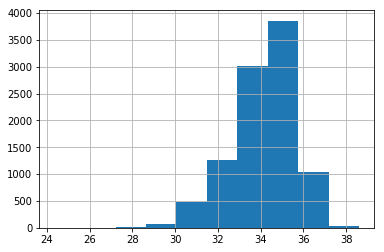

In [151]:
df.DMbest.hist()

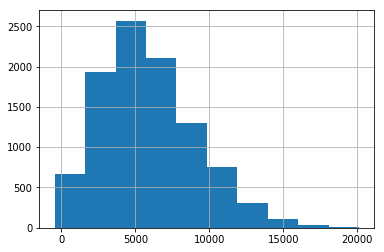

In [153]:
df.Vmod.hist()

In [168]:
from scipy.optimize import curve_fit


def myHubble(D, H0):
    return H0    

def PlotMe(ax, df, low, high, color='r', delta=0, label=None, param='DMbest', quality='Qs', mag='i'):
    
    dff = df[(df[param]>low) & (df[param]<high) & (df.Vmod >4000) & (df[quality]>0)]
    dff.plot.scatter(
                     x=mag+'***', y='H0', alpha=0.1, ax=ax, color='k', s=2
                     )

    X = dff[mag+'***'].values
    Y = dff['H0'].values+delta
    xmin = np.min(X)
    xmax = np.max(X)
    lab = True
    for i in np.arange(xmin, xmax, 1):
        xp = []
        yp = []
        for ii in range(len(X)):
            xi = X[ii]
            if xi>=i and xi<i+1:
                xp.append(xi)
                yp.append(Y[ii])
        if len(xp)>0:
            if lab:
                labe = label
                lab = False
            else:
                labe=None
            ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                        color=color, ms=6, label=labe)     
#             print np.median(xp), 10**np.median(yp)

    x_ax, y_ax = set_axes(ax, (5,18), (35,150), fontsize=14) 
    ax.set_yscale('log')
    
    from matplotlib.ticker import MultipleLocator

    from matplotlib.ticker import NullFormatter
    
    ax.set_yticks(np.arange(30,150, step=30))
    ax.yaxis.set_major_formatter(NullFormatter())  
    ax.yaxis.set_minor_formatter(NullFormatter())

    ax.yaxis.set_major_locator(MultipleLocator(30))
    ax.yaxis.set_minor_locator(MultipleLocator(10))

    plt.yticks([40, 70, 100, 130], ('40', '70', '100','130'))
    # ax.set_yticks(np.arange(50,140, step=10))



    y_ax.set_yticks(np.arange(30,150, step=30))
    y_ax.set_yscale('log')
    y_ax.yaxis.set_major_formatter(NullFormatter())  
    y_ax.yaxis.set_minor_formatter(NullFormatter())
    y_ax.yaxis.set_major_locator(MultipleLocator(30))
    y_ax.yaxis.set_minor_locator(MultipleLocator(10))    
    
    ax.set_ylabel(r'$H_{best}$', fontsize=18)
    ax.legend(loc=3)
    
    
    fit, cov = curve_fit(myHubble, X, dff.logH, sigma=dff.eDMbest/5.)
    m = fit[0]
    H0 = 10**m
    ax.plot([5,20], [H0, H0], '--', color='blue')

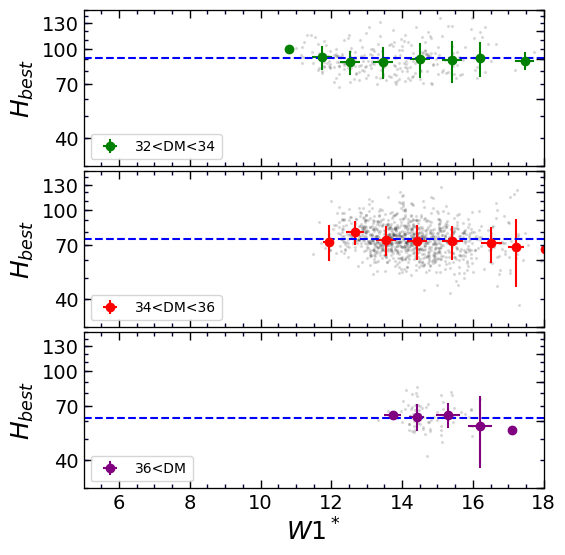

In [171]:
fig = py.figure(figsize=(5, 8), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(4,1) ; p=0

# ax = plt.subplot(gs[p]) ; p+=1
# PlotMe(ax, df, 31, 33, color='b', delta=0, label='DM<32')
mag='w1'


ax = plt.subplot(gs[p]) ; p+=1
PlotMe(ax, df, 32, 34, color='green', delta=0, label='32<DM<34', mag=mag)

ax = plt.subplot(gs[p]) ; p+=1
PlotMe(ax, df, 34, 36, color='r', label='34<DM<36', mag=mag)

ax = plt.subplot(gs[p]) ; p+=1
PlotMe(ax, df, 36, 40, color='purple', delta=0, label='36<DM', mag=mag)

ax.set_xlabel(r'$W1^*$', fontsize=18)

plt.subplots_adjust(hspace=0.03, wspace=0.2)

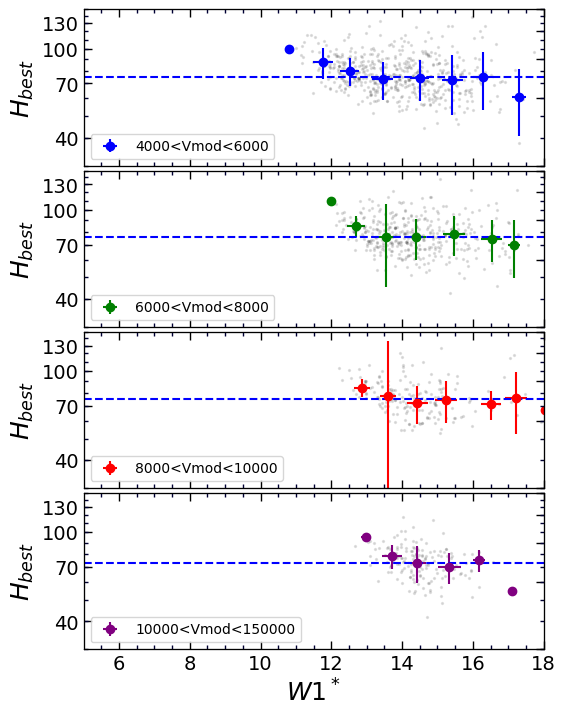

In [170]:
fig = py.figure(figsize=(5, 8), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(4,1) ; p=0

mag='w1'

ax = plt.subplot(gs[p]) ; p+=1
PlotMe(ax, df, 4000, 6000, color='b', delta=0, label='4000<Vmod<6000', param='Vmod', mag=mag)

ax = plt.subplot(gs[p]) ; p+=1
PlotMe(ax, df, 6000, 8000, color='g', delta=0, label='6000<Vmod<8000', param='Vmod', mag=mag)

ax = plt.subplot(gs[p]) ; p+=1
PlotMe(ax, df, 8000, 10000, color='r', delta=0, label='8000<Vmod<10000', param='Vmod', mag=mag)

ax = plt.subplot(gs[p]) ; p+=1
PlotMe(ax, df, 10000, 15000, color='purple', delta=0, label='10000<Vmod<150000', param='Vmod', mag=mag)

ax.set_xlabel(r'$W1^*$', fontsize=18)

plt.subplots_adjust(hspace=0.03, wspace=0.2)